<a href="https://colab.research.google.com/github/ullasbannur/AIML-PROJECT/blob/main/day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
y = df['target']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
x = df.drop('target',axis=1)

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
print(x_train.shape)

(212, 13)


In [ ]:
print(y_train.shape)

(212,)


In [ ]:
print(y_test.shape)

(91,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 100, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
print(clf_lr.best_params_)

{'C': 1, 'solver': 'liblinear'}


In [ ]:
test_pred = clf_lr.predict(x_test)

In [ ]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs


0.8461538461538461

KNeighborsClassifier - GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,10, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

n a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
In a Jupyter environment, please rerun this cell to show the HTML** representation ** bold textbold text** or trust the notebook.** bold text On GitHub, the HTML representation is unable to render, please try loading this bold text page with nbviewer.org. bold text

In [ ]:
print(clf_knn.best_params_)

{'n_neighbors': 5}


In [ ]:
test_pred_knn = clf_knn.predict(x_test)

In [ ]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.6043956043956044

DecisionTreeClassifier - GridSearchCV

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(1,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)
     

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
print(clf_dtc.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [ ]:
test_pred_dtc = clf_dtc.predict(x_test)

In [ ]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.7472527472527473


CONFUSION MATRIX

Since we got a accuracy of 81% using Linear-Regression, we use its predicted accuracy to find the confusion matrix

Logistic ** bold textRegression**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[31,  7],
       [ 7, 46]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        38
           1       0.87      0.87      0.87        53

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



KNeighborsClassifier

In [ ]:
confusion_matrix(test_pred_knn,y_test)

array([[22, 20],
       [16, 33]])

In [ ]:

print(classification_report(y_test,test_pred_knn))
     

              precision    recall  f1-score   support

           0       0.52      0.58      0.55        38
           1       0.67      0.62      0.65        53

    accuracy                           0.60        91
   macro avg       0.60      0.60      0.60        91
weighted avg       0.61      0.60      0.61        91



DecisionTreeClassifier

In [ ]:
confusion_matrix(test_pred_dtc,y_test)


array([[30, 15],
       [ 8, 38]])

In [ ]:

print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72        38
           1       0.83      0.72      0.77        53

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



To Plot a Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score

In [ ]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [ ]:
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]
     

In [ ]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

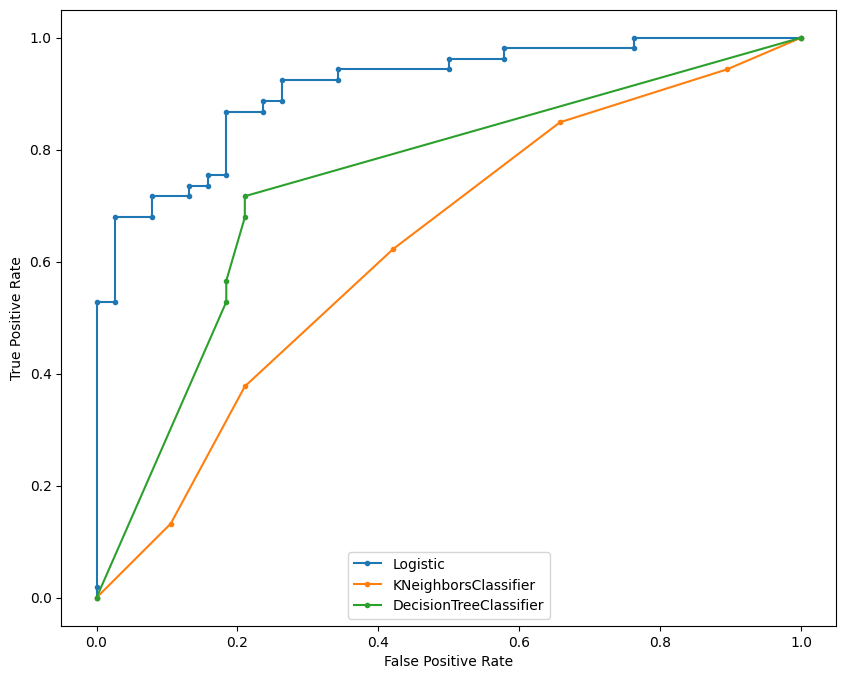

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

In [ ]:

from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 91.10000000000001 %
Logistic : ROC AUC = 62.8 %
Logistic : ROC AUC = 74.3 %


Code to allow user to query by providing details of a patient as input and determining whether the patient lives or dies

In [ ]:
# from pandas.core.window.expanding import ExpandingGroupby
# from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

# def Prediction() :
 # age = int(input("Age of the Patient :- "))
  #sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  #cp = int(input("Chest Pain Type :- "))
  #trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  #slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
#   new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

#   new_patient = new_patient.reshape(1,-1) #converting to 2D array

#   if clf_lr.predict(new_patient) == 0 :
#     return "The Patient with the above provided Vitals Dies!!!"
#   else :
#     return "The Patient with the above provided vitals Lives!!!"

# for i in range(n) :
#   print(Prediction())

So coming to the conclusion According To The Above Provided Vitals taken from a random patient our model has predicted that the Patient lives !!! The model can be used to check the Status of any number of Patients at a time which is time saving.